# Herkenning van handgeschreven cijfers met Deep Learning 1

## Neurale Netwerken

- Minor AAI Hogeschool van Amsterdam
- Docenten: Michiel Bontenbal & Maarten POst
- Vrijdag 16 februari 2024
- Acknowledgments: Stijn Oomes

### To do:
- Run het notebook
- Upload het notebook naar je Gitlab & maak aantekening in je logboek. Werk eventueel je bloom-tabel bij.

## Importeer libraries

In [52]:
# Import libraries. Ignore possible tensorflow warnings.
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras import models, layers, datasets
from keras.layers import Dense

## Verover de data

In [53]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [56]:
train_labels.shape

(60000,)

## Prepareer de images

In [57]:
train_data = train_images.reshape((60000,28*28))

In [58]:
train_data.shape

(60000, 784)

In [59]:
train_data_floats = train_data.astype('float32')/255

In [60]:
train_data_floats.min()

0.0

In [61]:
train_data_floats.max()

1.0

In [62]:
test_data = test_images.reshape((10000,28*28))
test_data_floats = test_data.astype('float32')/255

In [63]:
test_data.shape

(10000, 784)

In [64]:
test_data_floats.max()

1.0

## Prepareer de labels

In [65]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [66]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [67]:
train_labels_encoded[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Opdracht 1: 

We nemen hier het model over uit het filmpje van '3 blue 1 brown'. Bestudeer het filmpje en neem de parameters over in je het script hieronder

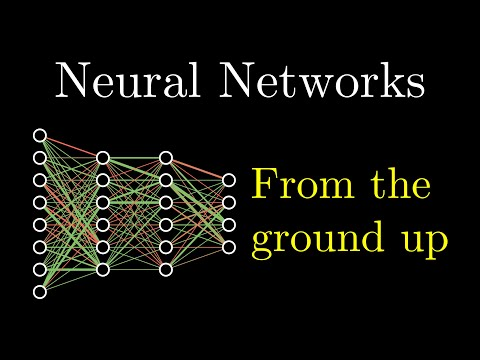

In [68]:
#BEGIN MET KIJKEN OP t = 3.30. Je mag stoppen op 5.35.
import IPython
IPython.display.YouTubeVideo('aircAruvnKk')

In [69]:
#OEFENING: VERVANG DE VRAAGTEKENS. GEBRUIK HET FILMPJE ALS INPUT.
model = models.Sequential()

#Hidden layer
model.add(layers.Dense(16, activation='relu'))

#Hidden layer 2
model.add(layers.Dense(16,activation = 'relu'))

#Output layer
model.add(layers.Dense(10,activation = 'softmax'))


In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
#Voordat je gaat compileren bestudeer onderstaand plaatje.
import IPython
IPython.display.Image(url='https://drek4537l1klr.cloudfront.net/chollet2/Figures/01-09.png')

In [73]:
#compileer het model met onderstaande parameters
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [74]:
history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 10,
    batch_size = 128,
    validation_data = (test_data_floats, test_labels_encoded)
)

Epoch 1/10


469/469 [==============================] - 4s 5ms/step - loss: 0.6626 - accuracy: 0.8066 - val_loss: 0.3162 - val_accuracy: 0.9150
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2971 - accuracy: 0.9163 - val_loss: 0.2568 - val_accuracy: 0.9278
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2498 - accuracy: 0.9285 - val_loss: 0.2310 - val_accuracy: 0.9350
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2246 - accuracy: 0.9358 - val_loss: 0.2133 - val_accuracy: 0.9388
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2078 - accuracy: 0.9404 - val_loss: 0.2022 - val_accuracy: 0.9414
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1962 - accuracy: 0.9433 - val_loss: 0.1956 - val_accuracy: 0.9412
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1859 - accuracy: 0.9463 - val_loss: 0.1887 - val_accuracy: 0.9440
Epoch 8/10
469/46

In [75]:
test_loss, test_acc =model.evaluate(test_data_floats, test_labels_encoded)

print(test_acc)

 17/313 [>.............................] - ETA: 0s - loss: 0.1627 - accuracy: 0.9467 

313/313 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9450
0.9449999928474426


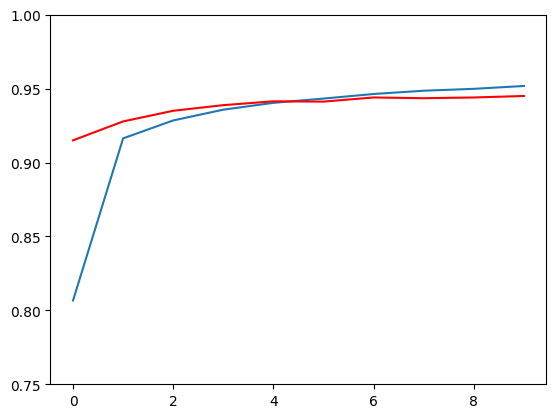

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

## Oefening 2. Verander de parameters van het model van opdracht 1 en kijk of je de accuracy kunt verbeteren.

### To do: Upload je notebook naar Gitlab en werk je logbook / bloom tabel bij.

Ik heb het aantal neurons per hidden layer behalve de laatste verviervoudigd en dit heeft de accuracy een klein beetje verbeterd.

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3877 - accuracy: 0.8917 - val_loss: 0.1916 - val_accuracy: 0.9449
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1666 - accuracy: 0.9513 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1237 - accuracy: 0.9628 - val_loss: 0.1178 - val_accuracy: 0.9653
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0974 - accuracy: 0.9714 - val_loss: 0.1019 - val_accuracy: 0.9692
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0805 - accuracy: 0.9760 - val_loss: 0.1050 - val_accuracy: 0.9680
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.0986 - val_accuracy: 0.9695
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0977 - val_accuracy: 0.9699
Epoch 

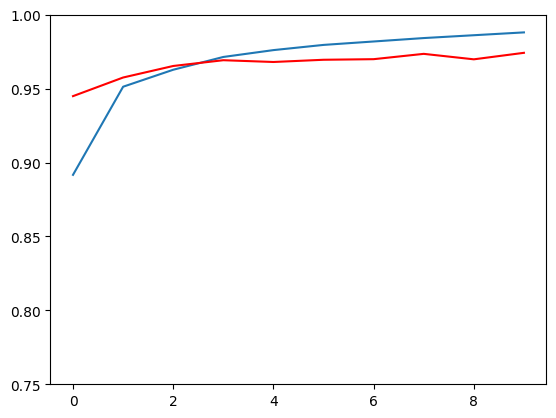

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model = models.Sequential()

#Hidden layer
model.add(layers.Dense(64, activation='relu')) #Verviervoudigde hoeveelheid neuronen

#Hidden layer 2
model.add(layers.Dense(64,activation = 'relu')) #Verviervoudigde hoeveelheid neuronen

#Output layer
model.add(layers.Dense(10,activation = 'softmax'))

#compileer het model met onderstaande parameters
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 10,
    batch_size = 128,
    validation_data = (test_data_floats, test_labels_encoded)
)
test_loss, test_acc =model.evaluate(test_data_floats, test_labels_encoded)

print(test_acc)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

model.summary()